In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm
import sklearn

**Explore data distribution and remove outliers**

In [2]:
# -- Read matrix containing embeddings and labels
path_X = '/Users/leandro/Desktop/ai_data/X.csv' 
X = pd.read_csv(path_X)

In [3]:
# Remove undesired column and filter mammalian entries
X = X.drop(columns=['Unnamed: 0'])
X_mammals = X[X['Taxonomy'] == 'Mammalia']

**Check how CN and prot_len distribution changes when removing non-mammals**

In [ ]:
X['Non_redundant'].hist(bins = 20, figsize=(12,8))

In [ ]:
X_mammals['Non_redundant'].hist(bins = 20, figsize=(12,8))

In [ ]:
X['prot_len'].hist(bins = 20, figsize=(12,8))

In [ ]:
X_mammals['prot_len'].hist(bins = 20, figsize=(12,8))

**Explore correlation among all dimensions**

In [4]:
# -- Compute correlation matrix among dimensiones (contains Pearson's r)
corr_matrix = X_mammals.corr() # generate correlation matrix
correlations = corr_matrix['Non_redundant'].sort_values(ascending=False) # check columns (dimensions) that correlates more to CN

In [72]:
# -- Different to plot correlation matrix
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8
0,1.000000,0.813926,0.365214,-0.622472,0.805360,-0.340347,-0.423088,-0.875190,0.176651
1,0.813926,1.000000,-0.198694,-0.490920,0.768602,-0.191081,-0.704305,-0.717802,0.599106
2,0.365214,-0.198694,1.000000,-0.414234,0.179475,-0.415282,0.410696,-0.393059,-0.760103
3,-0.622472,-0.490920,-0.414234,1.000000,-0.585723,0.843724,0.419716,0.795518,-0.040017
4,0.805360,0.768602,0.179475,-0.585723,1.000000,-0.433848,-0.658321,-0.914056,0.300612
5,-0.340347,-0.191081,-0.415282,0.843724,-0.433848,1.000000,0.183041,0.649430,-0.048284
6,-0.423088,-0.704305,0.410696,0.419716,-0.658321,0.183041,1.000000,0.469575,-0.579899
7,-0.875190,-0.717802,-0.393059,0.795518,-0.914056,0.649430,0.469575,1.000000,-0.206255
8,0.176651,0.599106,-0.760103,-0.040017,0.300612,-0.048284,-0.579899,-0.206255,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

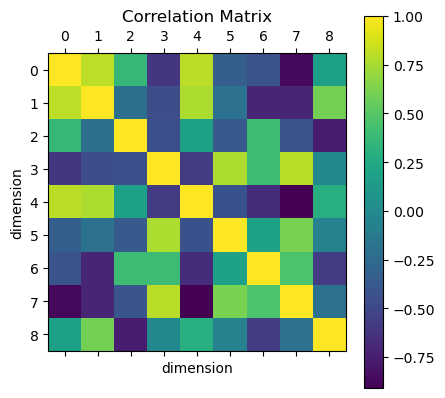

In [36]:
plt.matshow(corr)
cb = plt.colorbar()
plt.xlabel('dimension')
plt.ylabel('dimension')
plt.title('Correlation Matrix', fontsize=12)

In [73]:
# -- This explores pairwise correlation (what kind?) among ALL DIMENSIONS (not only against CN)
split_df = X_mammals.iloc[:9,:10]   # generate a subset from the original dataset
corr = df.corr()   # Compute correlaion (based on Pearson)

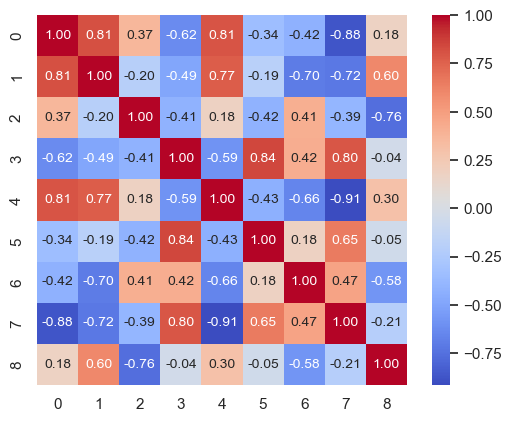

In [74]:
# -- Exploring another correlation coefficient matrix with Numpy
numbers = split_df.iloc[:,1:]  # select only numerical values 
cm = np.corrcoef(numbers.values.T)  # Compute correlation coefficient
sns.set(font_scale=1) # letter size
hm = sns.heatmap(cm, cmap='coolwarm', cbar=True, annot=True, square=True, fmt = '.2f', annot_kws={'size': 10},) # yticklabels=cols, xticklabels=cols

# Explore correlation between each vector dimension and CN values

In [66]:
X_mammals_numbers = X_mammals.iloc[:,1:-2]  # leave only embs dimensions and copy number values
corr_matrix = X_mammals_numbers.corr() # compute correlation matrix
correlations_cn = corr_matrix['Non_redundant'].sort_values(ascending=False) # check columns (dimensions) that correlates more to CN

Text(0.5, 1.0, 'All dimensions')

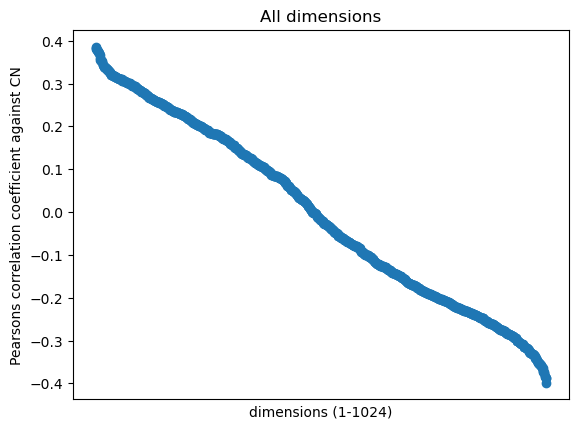

In [73]:
correlations = correlations_cn.iloc[1:]  # remove first row that match CN againts itself (coefficient = 1)
plt.scatter(y=correlations.values, x=correlations.index) # Plot correlation variation (sorted)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Pearsons correlation coefficient against CN')
plt.xlabel('dimensions (1-1024)')
plt.title('All dimensions')

In [69]:
# -- Convert pandas series to dataframe for easier manipulation
a = pd.DataFrame(correlations)
b = a.reset_index()
#correlations_df.columns # display columns names
correlations_df = b.rename(columns={'index':'dimension-1','Non_redundant':'Pearson'})

In [70]:
# -- Filter only positive values to look for the elbow of the curve
positive_corre = correlations_df[correlations_df.Pearson >= 0] # select only positive values
highest_corre = correlations_df[correlations_df.Pearson >= 0.3] # select values >= 0.3

Text(0.5, 1.0, 'Positive correlation')

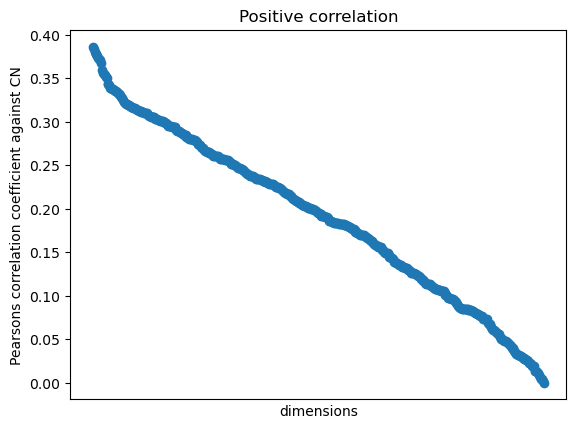

In [76]:
plt.scatter(y=positive_corre['Pearson'].values, x=positive_corre['dimension-1'].values)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Pearsons correlation coefficient against CN')
plt.xlabel('dimensions')
plt.title('Positive correlation')

Text(0.5, 1.0, 'Dimensions with Pearsons >0.3')

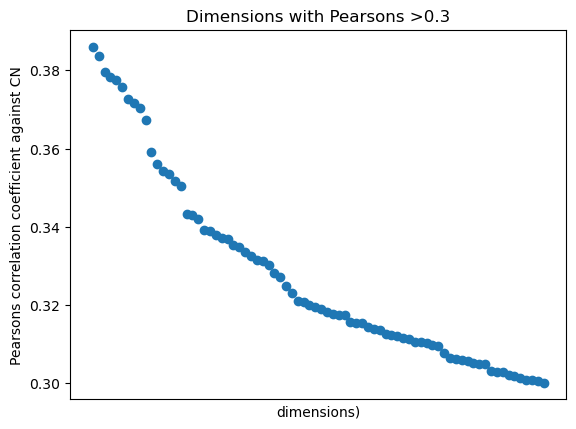

In [77]:
plt.scatter(y=highest_corre['Pearson'].values, x=highest_corre['dimension-1'].values)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Pearsons correlation coefficient against CN')
plt.xlabel('dimensions)')
plt.title('Dimensions with Pearsons >0.3')

In [4]:
# -- Leave only 10 most significant embeddings
X_elbow = X_mammals.filter(items=['ID','988','145','265','933','113','823','266','777','56','562','Non_redundant'])
X_elbow

,ID,988,145,265,933,113,823,266,777,56,562,Non_redundant
1,SurSur_1_49DF0280846,-0.017369,0.016718,-0.032478,-0.044936,-0.022542,-0.022717,0.004915,0.048942,-0.017950,-0.042185,115927
3,L1_Mur1_orf2DF0001882,-0.024762,0.008931,-0.039824,-0.054295,-0.017730,-0.027591,-0.001139,0.053326,-0.029806,-0.052391,13369
5,ParHer_6_210DF0279964,-0.020930,0.016847,-0.032547,-0.045340,-0.025566,-0.025180,0.001587,0.049749,-0.017111,-0.040188,41674
6,SurSur_4_851DF0280848,-0.020730,0.017835,-0.032135,-0.044404,-0.020837,-0.025679,0.005560,0.050003,-0.019657,-0.044546,128254
7,DauMad_6_11DF0276321,-0.016969,0.014217,-0.036481,-0.044973,-0.016301,-0.023053,0.003783,0.052850,-0.028362,-0.047285,15608
...,...,...,...,...,...,...,...,...,...,...,...,...
703,HyaHya_4_14DF0277504,-0.011749,0.010551,-0.026456,-0.047785,-0.020375,-0.020631,0.005901,0.044580,-0.021986,-0.044745,5103
704,HyaHya_5_15DF0277505,-0.011955,0.011106,-0.028816,-0.047030,-0.022054,-0.021535,0.006677,0.043760,-0.023344,-0.044216,103013
706,XerIna_6_11DF0281363,-0.007320,0.005212,-0.032632,-0.044141,-0.017290,-0.032377,-0.003611,0.044997,-0.019305,-0.048460,47596
707,CryFer_4_939DF0276082,-0.013731,0.008780,-0.030053,-0.051948,-0.022523,-0.025183,-0.001521,0.040545,-0.021716,-0.047571,18884


# Train different models using highest-scored dimensions

In [78]:
def plot_residuals(y_train_pred, y_train, y_test_pred, y_test):
    """Define function to plot residuals"""
    plt.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker='o', 
                edgecolor='white', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker='s', 
                edgecolor='white', label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=0, xmax=max(y_train_pred), color='black', lw=2) 
    plt.xlim([0, max(y_train_pred)])

**Simple linear regression**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [79]:
# -- Define X and y from X_elbow df, and split
X = X_elbow.iloc[:,1:-1].values
y = X_elbow['Non_redundant'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 0)  

In [80]:
slr = LinearRegression()  # Define simple linear regression (LR)

In [81]:
slr.fit(X_train, y_train) # fit model to training data 
y_train_pred = slr.predict(X_train)  # Relate y to X in training data
y_test_pred = slr.predict(X_test) # Predict y_test from X_test

In [82]:
# -- Evaluate model performance using MSE and R^2 (a standardized version of MSE with better interpretability)
print('MSE -- train: %.3f, test: % .3f' %
      (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)),
      '\nR^2 -- train: %.3f, test: %.3f' %
      (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE -- train: 19612929836.768, test:  11369563431.979 
R^2 -- train: 0.169, test: 0.233


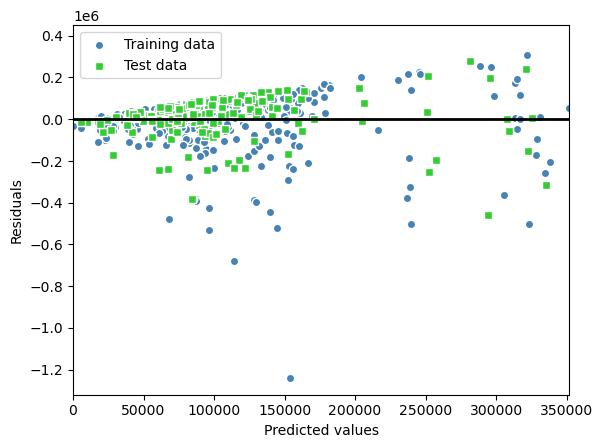

In [83]:
plot_residuals(y_train_pred, y_train, y_test_pred, y_test)

**Random Forest regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=1, n_jobs=-1, max_depth=15)

In [86]:
forest.fit(X_train, y_train)


RandomForestRegressor(max_depth=15, n_jobs=-1, random_state=1)

In [87]:
y_train_pred = forest.predict(X_train)

In [88]:
y_test_pred = forest.predict(X_test)

In [89]:
# -- Evaluate model performance using MSE and R^2 (a standardized version of MSE with better interpretability)
print('MSE -- train: %.3f, test: % .3f' %
      (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)),
      '\nR^2 -- train: %.3f, test: %.3f' %
      (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE -- train: 2930361780.518, test:  10954545673.789 
R^2 -- train: 0.870, test: 0.266


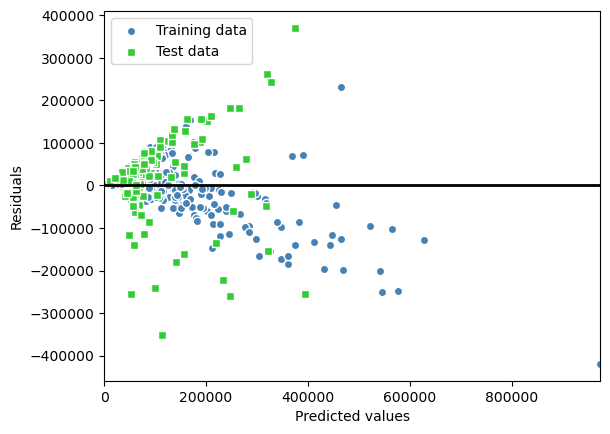

In [90]:
plot_residuals(y_train_pred, y_train, y_test_pred, y_test)

**Robust regression model using RANSAC**

In [91]:
from sklearn.linear_model import RANSACRegressor

In [97]:
ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50, 
                         loss='squared_error', residual_threshold=5.0, random_state=0)

In [110]:
y = y.reshape(-1,1)

In [111]:
X.shape

(583, 10)

In [112]:
ransac.fit(X,y)

/Users/leandro/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/leandro/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/leandro/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


RANSACRegressor(base_estimator=LinearRegression(), loss='squared_error',
                min_samples=50, random_state=0, residual_threshold=5.0)

In [117]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(0,max(y),1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], c='steelblue', edgecolor='white', marker='o', label='Inliers')
plt.scatter(X[outlier_mask_mask], y[outlier_mask], c='limegreen', edgecolor='white', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Copy number(M)')
plt.ylabel('dimension')
plt.legend(loc='upper left')

ValueError: X has 1 features, but RANSACRegressor is expecting 10 features as input.

In [115]:
X.shape

(583, 10)

# Training simple linear regression with whole vector to compare

In [135]:
# -- Define X and y from X_elbow df, and split
X = X_mammals.iloc[:,1:-3]
y = X_mammals['Non_redundant'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 0)  

In [139]:
slr.fit(X_train, y_train) # fit model to training data 
y_train_pred = slr.predict(X_train)  # Relate y to X in training data
y_test_pred = slr.predict(X_test) # Predict y_test from X_test

In [140]:
# -- Evaluate model performance using MSE and R^2 (a standardized version of MSE with better interpretability)
print('MSE -- train: %.3f, test: % .3f' %
      (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)),
      '\nR^2 -- train: %.3f, test: %.3f' %
      (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))print('MSE train: %.3f, test: % .3f' %
      (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

MSE train: 3886253.186, test:  1804310740361724559360.000
